In [39]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

C:\Users\Gabri\AppData\Local\Temp\ipykernel_4736\3910161231.py:14: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [40]:
import pandas as pd
  
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
print(housing)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [41]:
#mostra as informações iniciais do data base
print(housing.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [42]:
#mostra os tipos das colunas, quantidades , memória usada e etc..
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [43]:
#exibe algumas características da respectiva coluna , no caso da coluna categória ocean_proximity
print(housing["ocean_proximity"].value_counts())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [44]:
#também pode ser visto características de uma coluna não categórica
print(housing["total_rooms"].value_counts())

total_rooms
1527.0    18
1613.0    17
1582.0    17
2127.0    16
2053.0    15
          ..
4528.0     1
166.0      1
9807.0     1
5593.0     1
4242.0     1
Name: count, Length: 5926, dtype: int64


In [45]:
#exibe a descrição resumida de cada campo
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

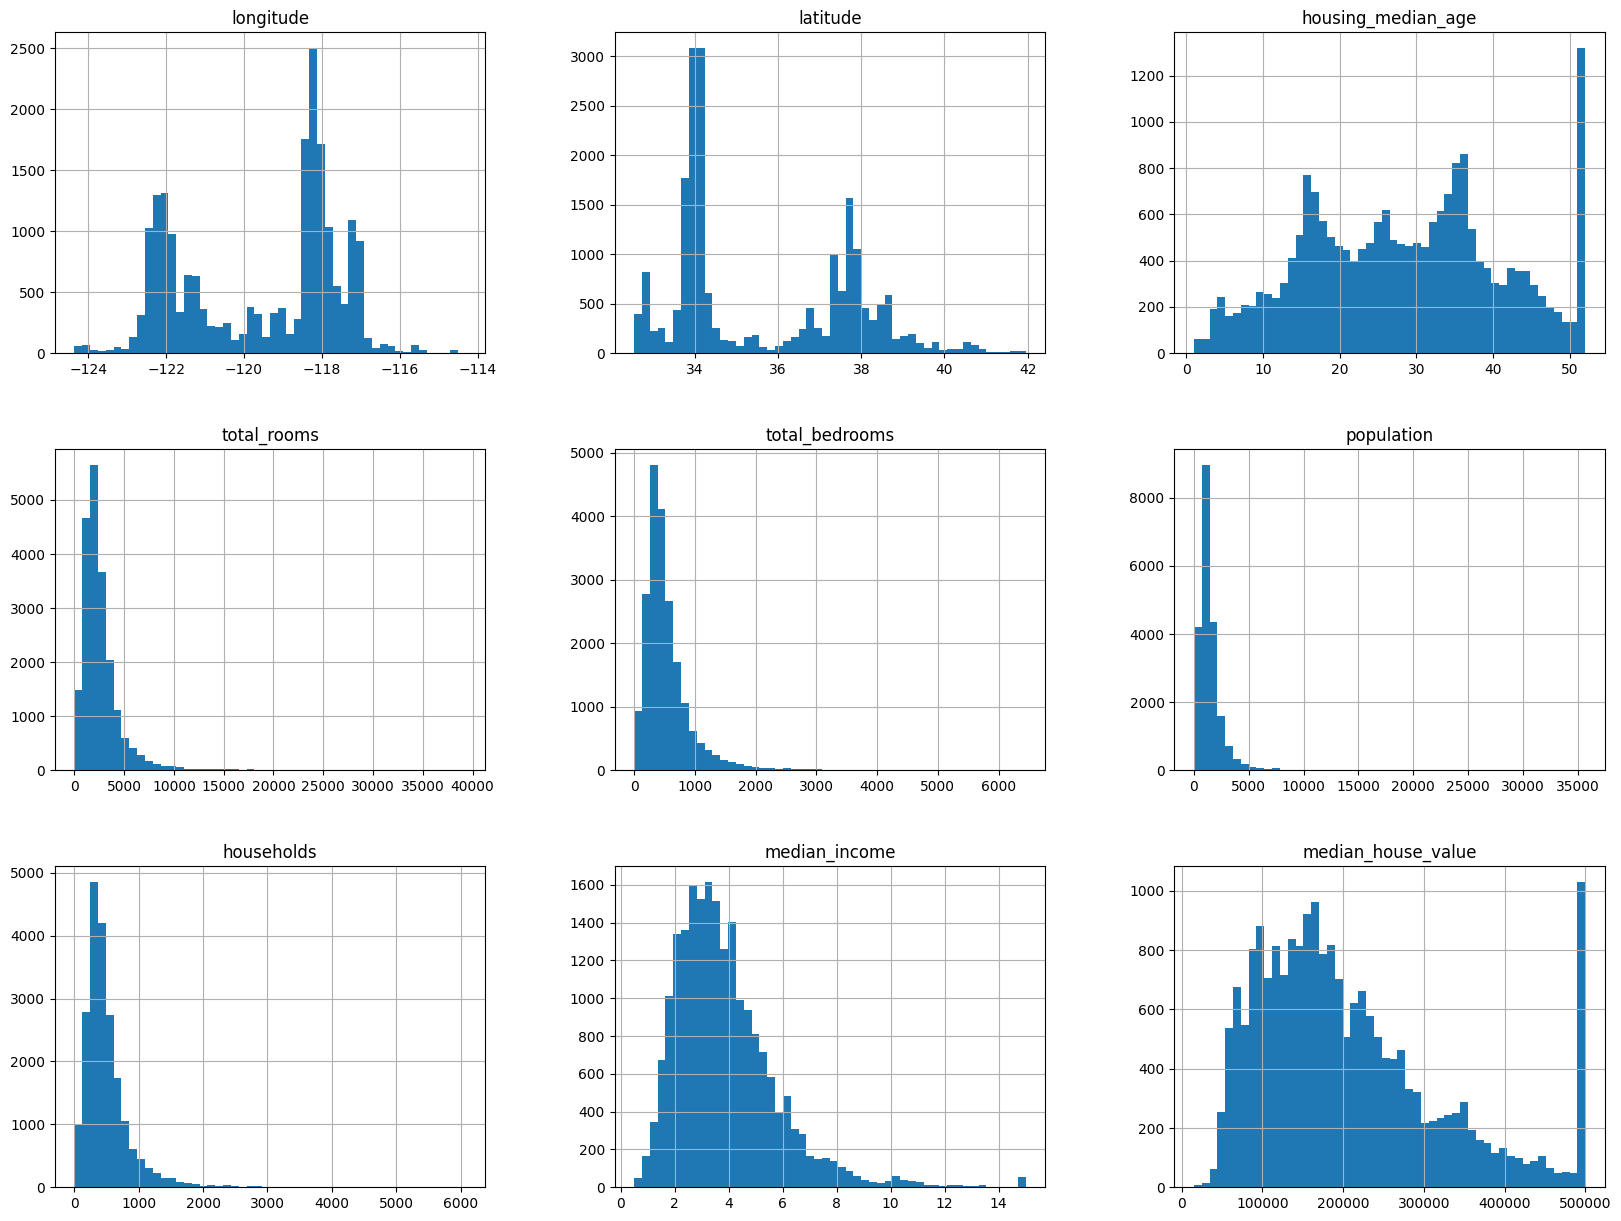

In [47]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

Aqui você cria um ID fixo para cada linha (ex.: usando longitude e latitude).
Depois aplica um hash (crc32) nesse ID.
Esse hash garante que a mesma linha sempre caia no mesmo conjunto (treino ou teste), mesmo se você rodar o código várias vezes ou atualizar o dataset.
Vantagem: se você receber novos dados futuramente, os registros antigos não mudam de conjunto → consistência garantida.
Desvantagem: é mais trabalhoso, precisa definir bem a coluna id.

In [ ]:
import numpy as np
from zlib import crc32

# Essa função serve para dividir o dataset em treino e teste de forma fixa, 
# garantindo que os mesmos registros sempre fiquem no mesmo conjunto, 
# mesmo se você rodar o código várias vezes ou atualizar os dados. 
# Cria index usando a coluna, no caso: latitude e longitude (Id)

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data,test_ratio,id_column): 
    ids = data[id_column] 
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio))        
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()
train_set,test_set = split_train_test_by_id(housing_with_id,0.2,"index")

print(train_set)

housing_with_id = housing.reset_index()
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set,test_set = split_train_test_by_id(housing_with_id,0.2,"id")

O scikit-learn sorteia linhas aleatoriamente para treino e teste.
O parâmetro random_state=42 serve para fixar a semente do gerador de números aleatórios → sempre a mesma divisão se você rodar de novo com o mesmo dataset.
Vantagem: simples, rápido, pronto para usar.
Desvantagem: se você adicionar linhas novas no dataset, a divisão pode mudar para os registros antigos → ou seja, um mesmo dado pode “trocar de lado” entre treino e teste ao longo do tempo.

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


train_set , test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(train_set,test_set)

Esse bloco de código transforma a renda em categorias e mostra visualmente quantas casas estão em cada faixa.
É útil para amostrar os dados antes de dividir treino/teste, 
principalmente se você quer fazer amostragem estratificada (stratified sampling).

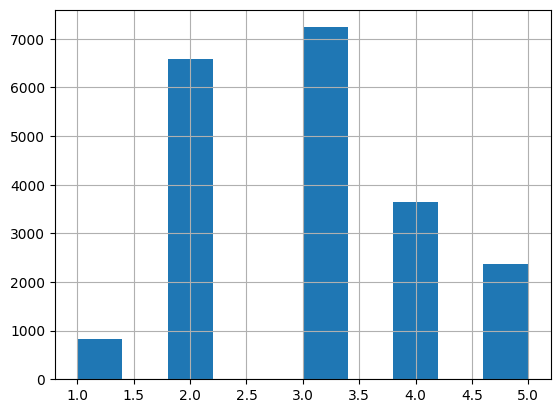

In [48]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins =[0.,1.5,3.0,4.5,6.,np.inf],
                               labels=[1,2,3,4,5])

housing["income_cat"].hist()

plt.show()

Esse código divide os dados em treino (80%) e teste (20%), garantindo que a variável income_cat mantenha a mesma distribuição nos dois conjuntos. 
Isso evita que o modelo aprenda ou seja avaliado de forma enviesada caso uma categoria fique desbalanceada.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size= 0.2, random_state=42)
for train_index , test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))

Qual é melhor Random ou estratificada?

Depende do objetivo e do tipo de dado, mas na prática:

🔹 Random (aleatória)

Como funciona: divide os dados em treino e teste escolhendo linhas de forma totalmente aleatória.

Problema: se você tiver uma coluna importante e desbalanceada (ex: classe rara ou categorias com proporções diferentes), pode acontecer de no conjunto de teste quase não aparecer essa categoria → isso atrapalha a avaliação do modelo.

Exemplo:

Dataset de pacientes: 90% não fumantes, 10% fumantes.

Se dividir aleatoriamente, o conjunto de teste pode cair só com 5% de fumantes.

O modelo será testado em uma distribuição diferente da real.

🔹 Estratificada

Como funciona: divide os dados mantendo a mesma proporção de uma variável-chave (geralmente a variável alvo ou uma variável correlacionada).

Vantagem: garante que treino e teste reflitam a distribuição real dos dados.

Exemplo:

Se no dataset completo 10% são fumantes, no treino e no teste também será ~10% fumantes.

Isso dá uma avaliação mais justa e realista do modelo.

✅ Conclusão

Se seus dados têm categorias desbalanceadas (como classes em classificação ou faixas de renda no seu exemplo), estratificação é a melhor escolha.

Se os dados já são bem distribuídos, a divisão aleatória pode ser suficiente.

Na prática em Machine Learning, o mais comum é usar estratificação em relação à variável alvo (y).
No exemplo do housing, a variável income_cat foi criada justamente para servir de proxy do alvo e garantir que renda (um fator importante para prever preços de casas) fique bem representada.

Criaremos uma cópia dos dados de treinamento para manipularmos daqui em diante sem alterá-los (fuçar)

In [ ]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True,errors=False)

In [ ]:
housing = strat_train_set.copy()


Criaremos uma diagrama de dispersão baseado nas informações de latitude e longitude

<Axes: xlabel='longitude', ylabel='latitude'>

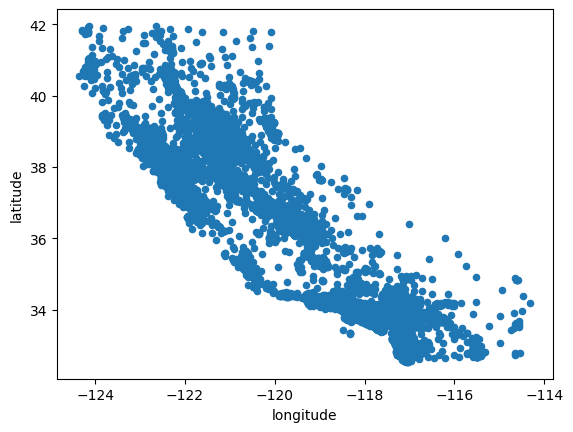

In [49]:
housing.plot(kind="scatter", x="longitude", y= "latitude")

Olhando assim fica difícil identificar algum padrão. Para isso , iremos definir a opção "alpha" para "0.1", assim facilitando a visualização
dos locais onde há uma alta densidade de pontos de dados.

<Axes: xlabel='latitude', ylabel='longitude'>

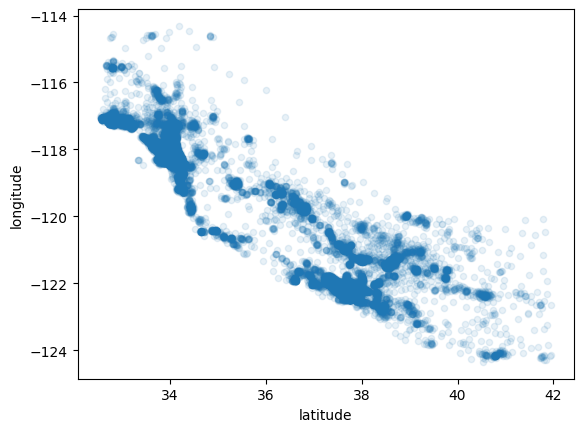

In [50]:
housing.plot(kind="scatter", x="latitude", y = "longitude" , alpha = 0.1)

Exibe um mapa da Califórnia onde a posição é lat/long, o tamanho indica população e a cor indica preço das casas.

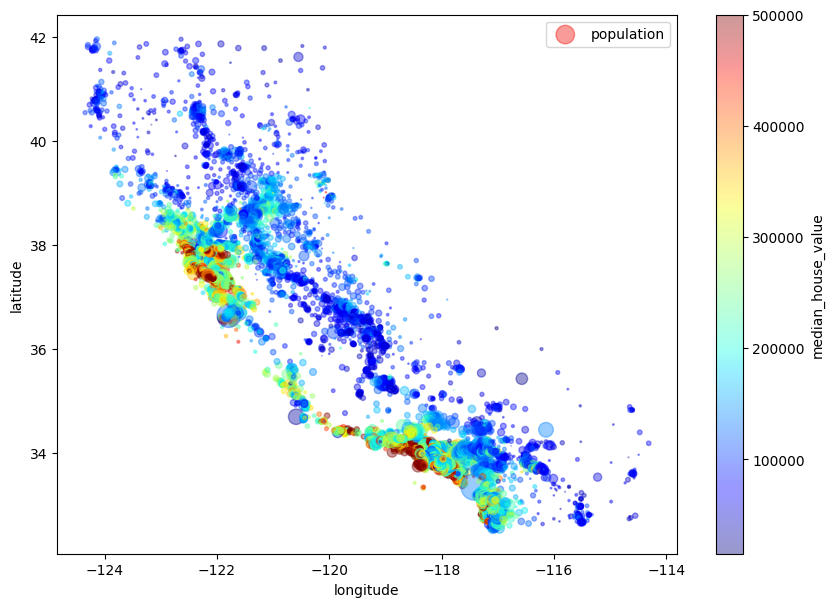

In [51]:
housing.plot(
    kind="scatter",         # tipo de gráfico = dispersão
    x="longitude",          # eixo X = longitude (posição geográfica)
    y="latitude",           # eixo Y = latitude (posição geográfica)
    alpha=0.4,              # transparência dos pontos (40%)
    s=housing["population"]/100,  # tamanho dos pontos proporcional à população
    label="population",     # legenda para os pontos
    figsize=(10,7),         # tamanho do gráfico
    c="median_house_value", # cor dos pontos de acordo com o valor da mediana das casas
    cmap=plt.get_cmap("jet"), # mapa de cores (do azul até o vermelho)
    colorbar=True           # adiciona barra de cores para interpretar os valores
)

plt.legend()  # mostra a legenda ("population")

Como o conjunto de dados não é muito grande , você pode calcular o facilmente o coeficiente de correlação padrão
(também chamado de r de Pearson) entre cada par de atributos, utilizando o método corr()

No caso baixo , pegaremos apenas os coeficientes de correlação entre numéricos

In [52]:
corr_matrix = housing.select_dtypes(include=["float64", "int64"]).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

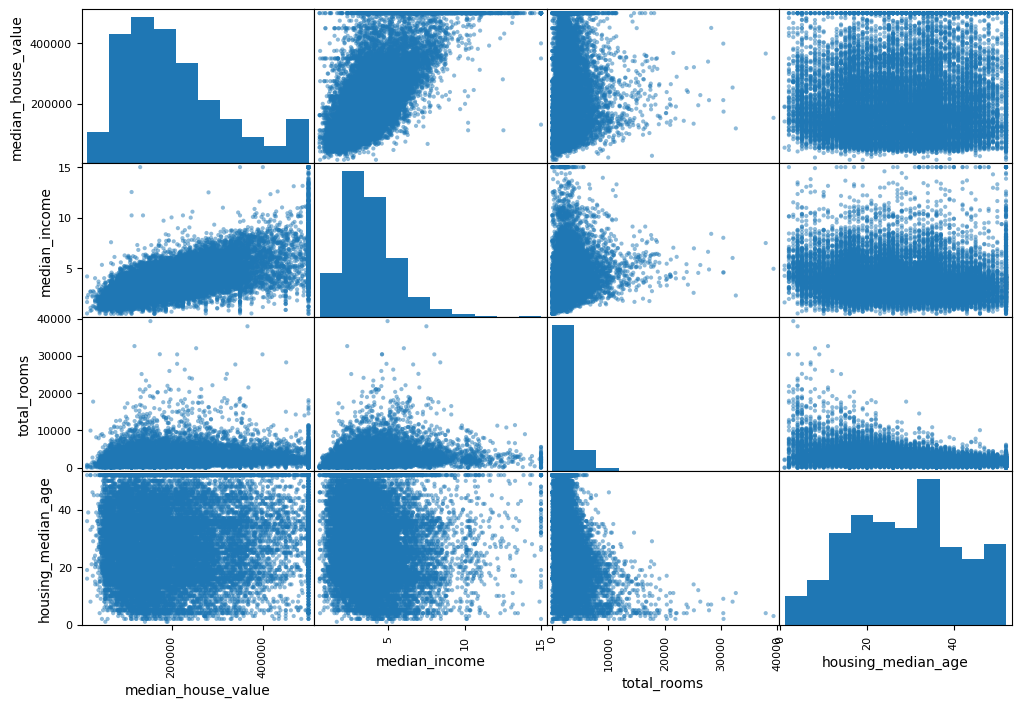

In [53]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]

sm = scatter_matrix(housing[attributes], figsize=(12,8))

plt.show()

1️⃣ housing.plot(kind="scatter", ...)

O que faz: cria um scatter plot simples entre duas variáveis (x e y) do seu DataFrame.

Exemplo: longitude x latitude, tamanho dos pontos = população, cor = valor da casa.

Foco: uma visualização por vez, geralmente para explorar relações geográficas ou entre duas variáveis.

2️⃣ scatter_matrix(housing[attributes], figsize=(12,8))

O que faz: cria uma matriz de gráficos de dispersão para todas as combinações de variáveis numéricas listadas em attributes.

Exemplo: se attributes = ["median_house_value","median_income","total_rooms","housing_median_age"], ele gera 16 gráficos:

diagonal: histogramas de cada variável

fora da diagonal: scatter plots de cada par de variáveis

Foco: explorar correlações e padrões entre várias variáveis ao mesmo tempo.

🔹 Resumindo a diferença em uma linha:

plot(kind="scatter") → um gráfico entre duas variáveis.

scatter_matrix() → vários gráficos de dispersão entre pares de variáveis, mais análise exploratória.

O atributo mais promissor para prever o valor médio dos imóveis é a renda média, então observamos o grafico abaixo:

<Axes: xlabel='median_income', ylabel='median_house_value'>

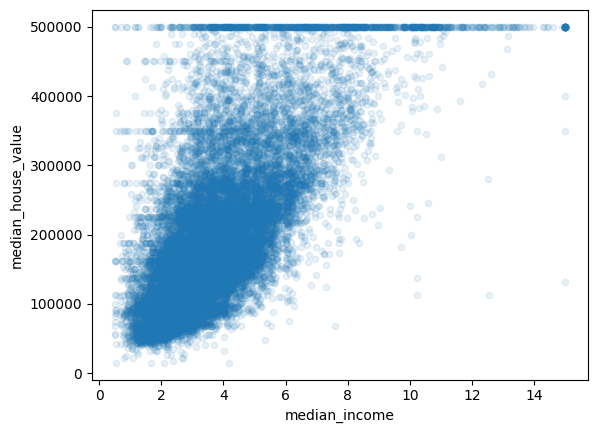

In [54]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)


In [55]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_housegold"] = housing["population"]/housing["households"]

corr_matrix =  housing.select_dtypes(include=["float64", "int64"]).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_housegold   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

Vimos que rooms_per_household está mais correlacionado ao valor do imóvel do que o número total de cômodos ou quartos

PREPARE OS DADOS PARA O APRENDIZADO DE MÁQUINA

Antes de mais nada , reverteremos um conjunto de treinamento limpo (ao copiar novamente "strat_train_set") e vamos separar os previsores e os rótulos,
visto que não queremos necessariamente aplicar as mesmas transformações às previsões e aos valores-alvo (repare que drop() cria uma cópia
dos dadaos e não afeta o "strat_train_set):

In [56]:
housing = strat_test_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

LIMPANDO OS DADOS

Os algorítimos de AM não funciona com valores ausentes. 
No nosso caso , o campo total_bedroom teve alguns valores ausentes.
Para esse caso , temos 3 opções:

1- Abrir mão das regiões correspondentes
2- Abrir não de todo o atributo
3- Definir os valores para algum valor (zero,a média, a mediana etc..)

In [ ]:
housing.dropna(subset=["total_bedrooms"]) #opção 1
housing.drop("total_bedrooms",axis=1) #opção 2
median = housing["total_bedrooms"].median() #opção 3
housing["total_bedrooms"].fillna(median,inplace=True)

print(median)

O scikit-learn fornece uma classe que se encarrega dos valores ausente:


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

A média só pode ser calculada em atributos não categóricos.
Nesse caso , devemos retirar o campo ocean_proximity

In [ ]:
housing_num = housing.drop("ocean_proximity",axis=1)

Agora podemos ajustar a instância de imputer aos dados de trainamento utilizando o método fit()

In [ ]:
imputer.fit(housing_num)

A imputer já se responsabilizou de fazer a média do campo , porém , para novos dados devemos tratar isso , para quando entrar em produção
não termos problemas.

In [ ]:
imputer.statistics_

In [ ]:
housing_num.median().values

Agora utilizaremos a imputer "treinada" para transformar o conjunto de treinamento substituindo os valores ausentes pelas médias aprendidas:

In [ ]:
x = imputer.transform(housing_num)

print(x)

In [ ]:
housing_tr = pd.DataFrame(x,columns=housing_num.columns,index=housing_num.index)

MANIPULANDO TEXTOS E ATRIBUTOS CATEGÓRICOS

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

Como comentado anteriormente , o aprendizado de máquina prefere trabalhar valores numéricos aos categóricos.
Para isso , o Sklearn nos fornece a classe OrdinalEncoder para fazer tais conversões:

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

#lembrando que housing_cat é a variável que armazena o valor de "ocean_proximity"
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

Você pode obter a lista de categorias usando a instância variável categories_.
Nela contém um arrayID de categorias para cada atributo categórico.
No nosso caso , uma lista com apenas um atributo categórico "ocean_proximity"

In [ ]:
ordinal_encoder.categories_

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

👉 Diferença principal entre OrdinalEncoder e OneHotEncoder:

🔹 OrdinalEncoder:
    *Transforma cada categoria em um número inteiro (0, 1, 2, 3...).
    *Exemplo com ocean_proximity:

    ["<1H OCEAN", "INLAND", "NEAR BAY", "NEAR OCEAN", "ISLAND"]
    ↓
    [0, 1, 2, 3, 4]

    *Simples, mas cria uma ordem artificial entre categorias (ex: dizer que INLAND=1 é "menor" que NEAR BAY=2).

    *Isso pode enganar o modelo, porque “ocean_proximity” não tem ordem natural.

🔹 OneHotEncoder:
    *Cria colunas binárias para cada categoria (dummy variables).
    *Exemplo com 5 categorias:

    ["<1H OCEAN"] → [1, 0, 0, 0, 0]
    ["NEAR BAY"]  → [0, 0, 1, 0, 0]

    *Evita ordem falsa, mas gera mais colunas (dimensionalidade maior).